# Let's find out the netflix movies!!!
## And how they are formed!!

# Import Libraries & Font & File

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px

In [21]:
#Only for publishing
import warnings
warnings.filterwarnings('ignore')

In [22]:
plt.rc('font', family='Arial Unicode MS') # For MacOS
mpl.rcParams['axes.unicode_minus'] = False  

In [23]:
#Bring file into the notebook
nf = pd.read_csv('netflix_titles.csv')

# Observe & Ananyze Data 

In [24]:
1#Analyze the heads of the data
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [25]:
#do not abbreviate the columns
pd.set_option('display.max_columns', None)
nf

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [26]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Cleaning Data

In [27]:
#fill in the missing values
nf['director'].fillna('Not Specified', inplace=True)
nf['cast'].fillna('Not Specified', inplace=True)
nf['country'].fillna('Not Specified', inplace=True)
nf['date_added'].fillna('Not Specified', inplace=True)
nf['rating'].fillna('No Rating', inplace=True)


In [11]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [28]:
#check duplicates
nf.duplicated('title')


0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

# Netflix Colors

### I will use Netflix colors to make the plots more attractive

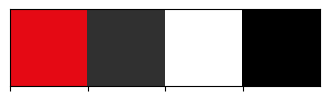

In [29]:
#netflix color palette
netflix_palette = ['#E50914','#303030','#FFFFFF', '#000000']

#show netflix color palette
sns.palplot(netflix_palette)


## Find some relevancy

In [31]:
#find the number of movies and tv shows
nf['type'].value_counts()

#find the number of movies and tv shows pie chart use plotly, color manually
fig = px.pie(nf, values=nf['type'].value_counts(), names=nf['type'].value_counts().index, color_discrete_sequence=netflix_palette)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Number of Movies and TV Shows')
fig.show()

## Make genres seperated to analyze

In [32]:
#find genres of movies and tv shows
nf['listed_in'].value_counts()

#with the commma, we can split the genres
nf['listed_in'].str.split(',').explode().value_counts()

#find the number of movies and tv shows by genre
nf['listed_in'].str.split(',').explode().value_counts()

#remove the space in front of the genre
nf['listed_in'].str.split(',').explode().str.strip().value_counts()

#find the number of movies and tv shows by genre
nf['listed_in'].str.split(',').explode().str.strip().value_counts()

#remove if there is TV Shows, Movies, Tv in the genre
nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').value_counts()

#remove space in front of the genre
nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().value_counts()

#drop blank genre
nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts()

#make graph of the number of movies and tv shows by genre with plotly
#opposite color
fig = px.bar(nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts(), color=nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts(), color_continuous_scale=netflix_palette[::-1])
fig.update_layout(title_text='Number of Movies and TV Shows by Genre')
fig.show()


### Use Generes to find some relevancy between genres

In [33]:
#make new dataframe with this nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts()
nf_genres = nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts().to_frame().reset_index()
nf_genres


#if movie or tv show has genre, it will be 1, if not, it will be 0
nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().unique()

#make new column for each genre and make new dataframe
for genre in nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().unique():
    nf[genre] = nf['listed_in'].str.contains(genre).astype(int)

nf

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Documentaries,International,Dramas,Mysteries,Crime,Action & Adventure,Docuseries,Reality,Romantic,Comedies,Horror,Children & Family,Independent,British,Spanish-Language,Thrillers,Music & Musicals,Sci-Fi & Fantasy,Kids',Classic,Anime Features,Sports,Anime Series,Korean,Science & Nature,Teen,Cult,Faith & Spirituality,LGBTQ,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,Classic & Cult
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,Not Specified,Not Specified,Not Specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8803,s8804,TV Show,Zombie Dumb,Not Specified,Not Specified,Not Specified,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


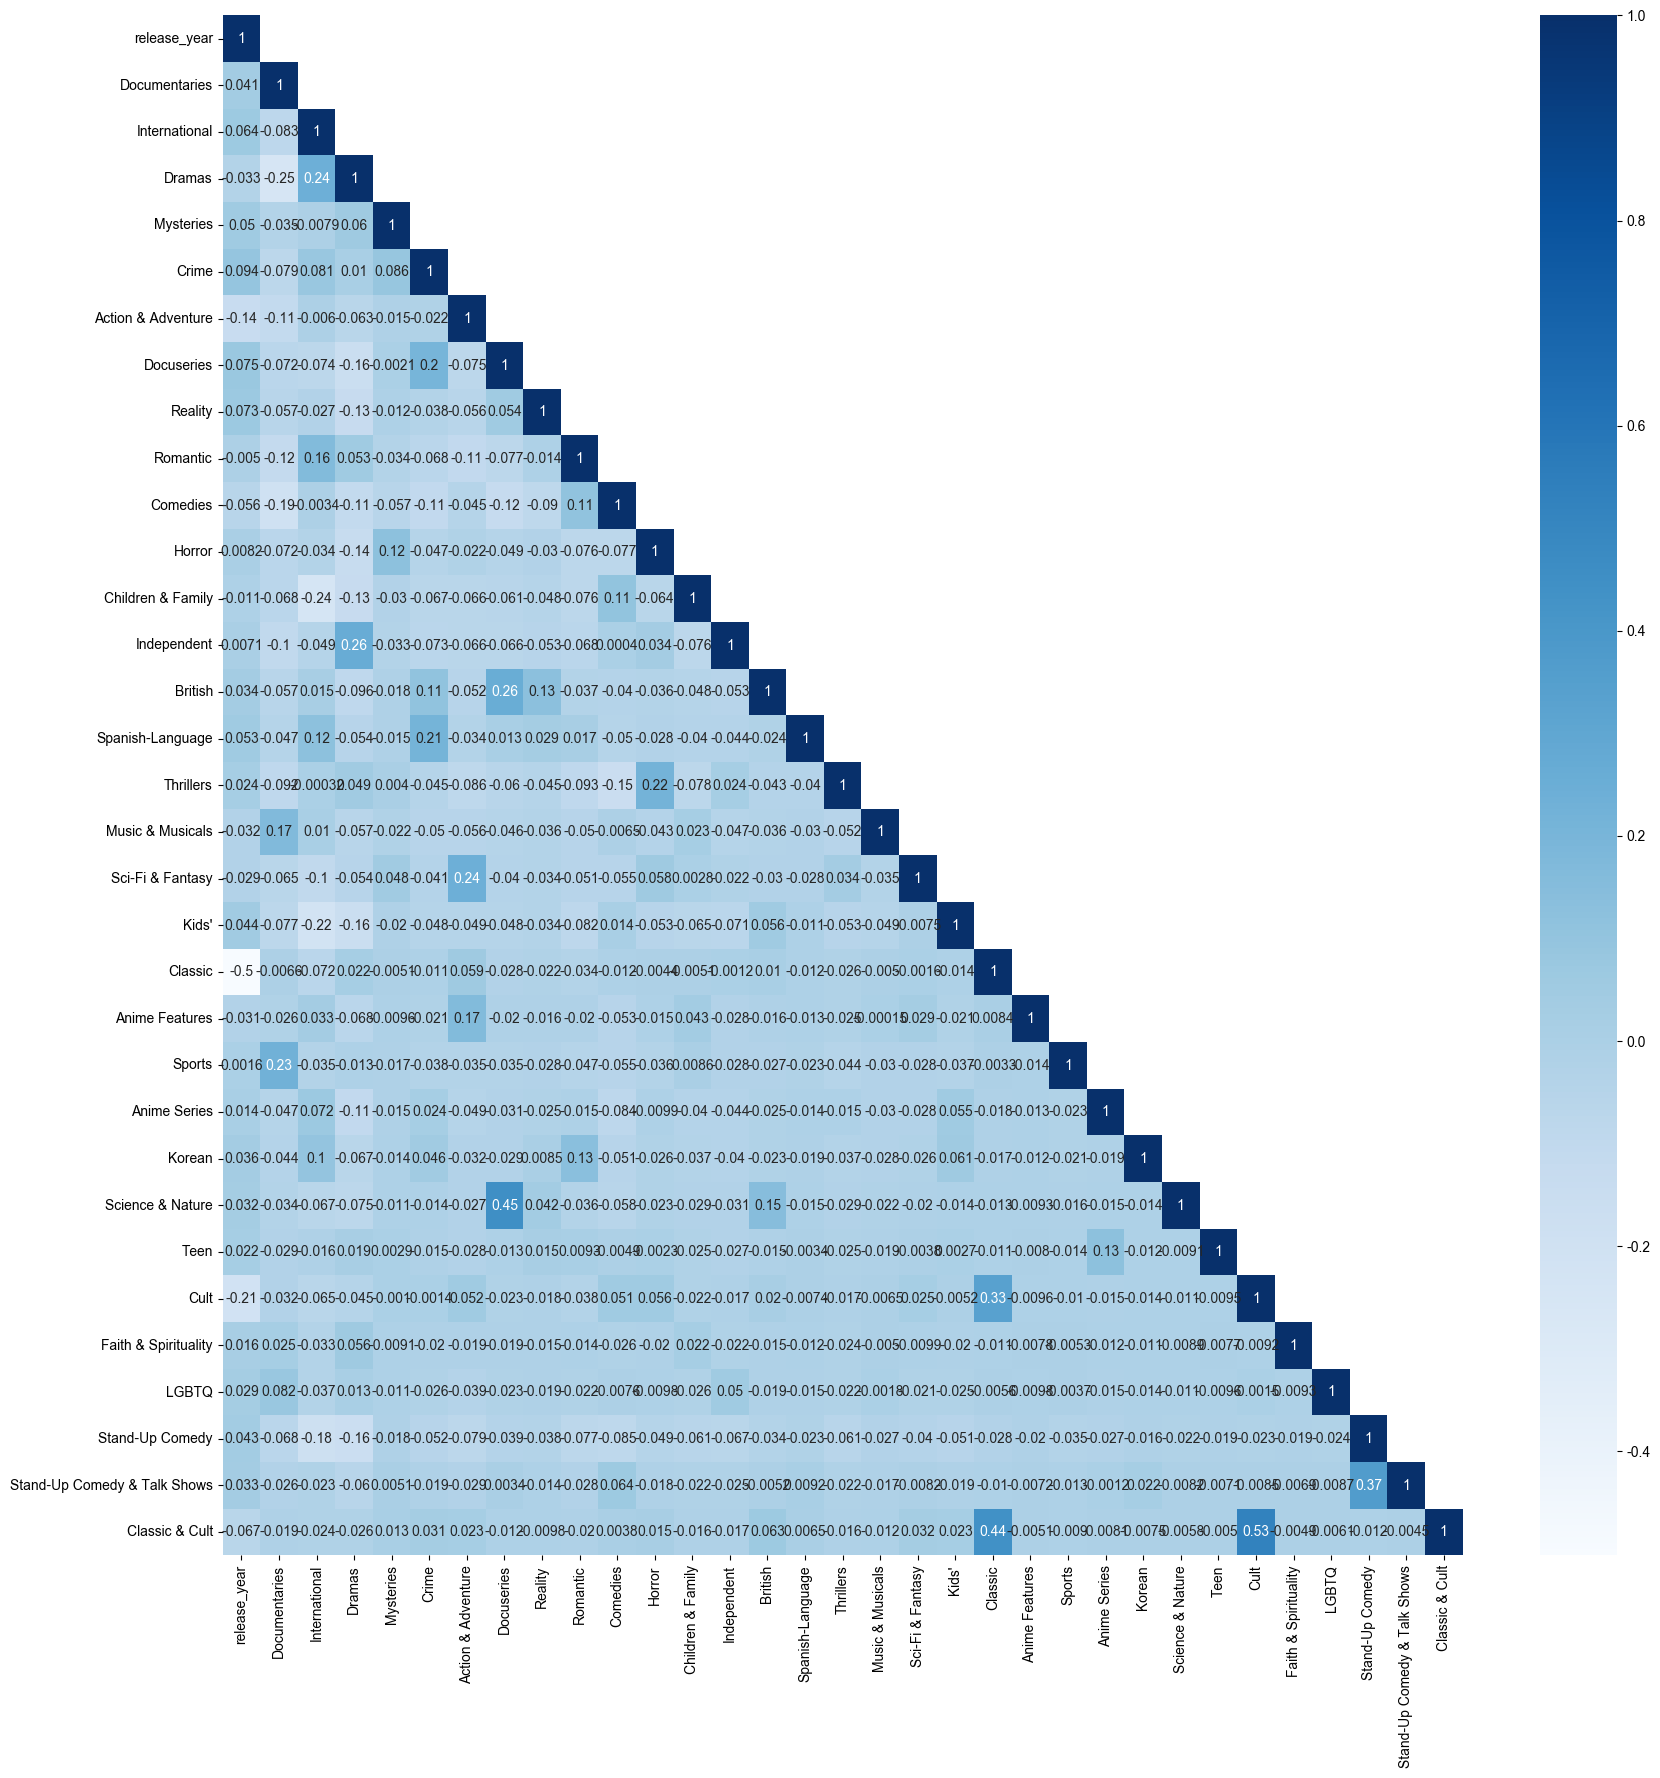

In [34]:
#correlation matrix of nf
nf.corr()

#correlation matrix of nf as heatmap, show only bottom half with overlapping
plt.figure(figsize=(20,20))
sns.heatmap(nf.corr(), annot=True, cmap='Blues', mask=np.triu(nf.corr(), k=1))
plt.show()

### Bit interesting 0.23 on Sports and Documentary, Independent with Dramas as 0.26, Documentaries with British as 0.26.

### I will dig more on to this data, so stay tuned!